# Data Mining Project

In [133]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib.patches import Rectangle
from matplotlib.gridspec import GridSpec

In [134]:
df = pd.read_csv("education.csv")

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    480 non-null    object 
 1   NationalITy               480 non-null    object 
 2   PlaceofBirth              480 non-null    object 
 3   StageID                   480 non-null    object 
 4   GradeID                   480 non-null    object 
 5   SectionID                 480 non-null    object 
 6   Topic                     480 non-null    object 
 7   Semester                  480 non-null    object 
 8   Relation                  480 non-null    object 
 9   raisedhands               479 non-null    float64
 10  VisITedResources          479 non-null    float64
 11  AnnouncementsView         475 non-null    float64
 12  Discussion                479 non-null    float64
 13  ParentAnsweringSurvey     479 non-null    object 
 14  Parentscho

In [136]:
df.describe(include='all')

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
count,480,480,480,480,480,480,480,480,480,479.000000,479.00000,475.000000,479.000000,479,480,480,480
unique,2,14,14,3,10,3,12,2,2,NaN,NaN,NaN,NaN,2,2,2,3
top,M,KW,KuwaIT,MiddleSchool,G-02,A,IT,F,Father,NaN,NaN,NaN,NaN,Yes,Good,Under-7,M
freq,304,179,180,249,147,283,95,245,283,NaN,NaN,NaN,NaN,270,293,290,212
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.881002,54.91023,38.332632,43.392484,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.726837,33.02152,26.448798,27.600035,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.00000,0.000000,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.000000,20.00000,15.000000,20.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,65.00000,33.000000,39.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.000000,84.00000,58.000000,70.000000,NaN,NaN,NaN,NaN


In [137]:
df.head(10)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15.0,16.0,2.0,20.0,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20.0,20.0,3.0,25.0,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10.0,7.0,0.0,30.0,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30.0,25.0,5.0,35.0,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40.0,50.0,12.0,50.0,No,Bad,Above-7,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42.0,30.0,13.0,70.0,Yes,Bad,Above-7,M
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35.0,12.0,0.0,17.0,No,Bad,Above-7,L
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50.0,10.0,15.0,22.0,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12.0,21.0,16.0,50.0,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70.0,80.0,25.0,70.0,Yes,Good,Under-7,M


In [138]:
sum(df.isna().sum()) + sum(df.isnull().sum())  # 18 missing values found

18

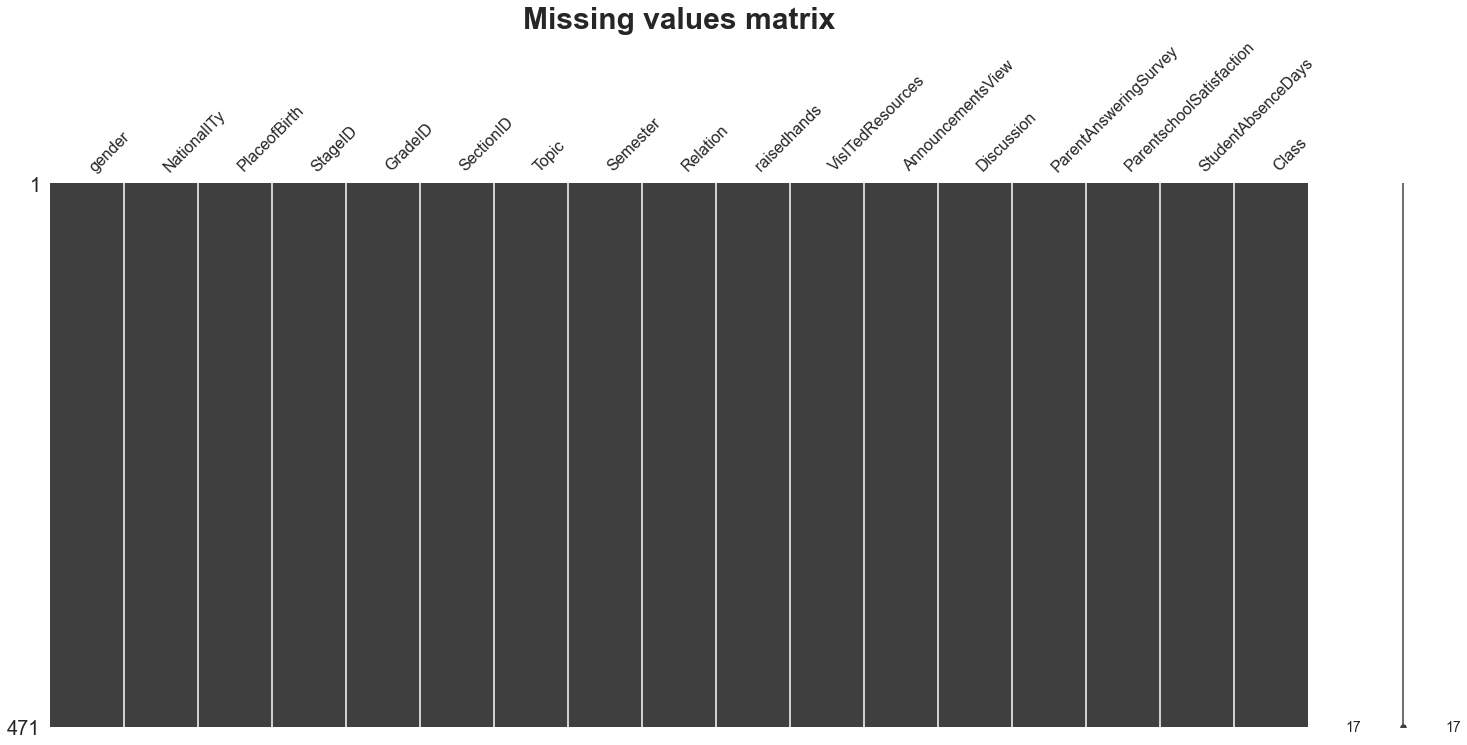

In [148]:
import missingno as msno
msno.matrix(df)
plt.title('Missing values matrix', fontsize=30, fontweight='bold', pad=10)
plt.show()

In [147]:
df = df.dropna()

In [149]:
print(df.shape[0] - df.drop_duplicates().shape[0]) 

3


In [150]:
df = df.drop_duplicates()

In [151]:
df['gender'] = df.gender.apply(lambda x: 1 if x == 'F' else 0)

In [152]:
df.Semester.unique()

array(['F', 'S'], dtype=object)

In [153]:
df['Semester'] = df.Semester.apply(lambda x: 1 if x == 'F' else 0)

In [154]:
df.Topic.unique()

array(['IT', 'Math', 'Arabic', 'Science', 'English', 'Quran', 'Spanish',
       'French', 'History', 'Biology', 'Chemistry', 'Geology'],
      dtype=object)

In [155]:
i = 1
for topic in df.Topic.unique():
    df['Topic'] = df.Topic.apply(lambda x: i if x == topic else x)
    i += 1

In [156]:
df.Topic.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [157]:
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,0,KW,KuwaIT,lowerlevel,G-04,A,1,1,Father,15.0,16.0,2.0,20.0,Yes,Good,Under-7,M
1,0,KW,KuwaIT,lowerlevel,G-04,A,1,1,Father,20.0,20.0,3.0,25.0,Yes,Good,Under-7,M
2,0,KW,KuwaIT,lowerlevel,G-04,A,1,1,Father,10.0,7.0,0.0,30.0,No,Bad,Above-7,L
3,0,KW,KuwaIT,lowerlevel,G-04,A,1,1,Father,30.0,25.0,5.0,35.0,No,Bad,Above-7,L
4,0,KW,KuwaIT,lowerlevel,G-04,A,1,1,Father,40.0,50.0,12.0,50.0,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,1,Jordan,Jordan,MiddleSchool,G-08,A,11,0,Father,5.0,4.0,5.0,8.0,No,Bad,Above-7,L
476,1,Jordan,Jordan,MiddleSchool,G-08,A,12,1,Father,50.0,77.0,14.0,28.0,No,Bad,Under-7,M
477,1,Jordan,Jordan,MiddleSchool,G-08,A,12,0,Father,55.0,74.0,25.0,29.0,No,Bad,Under-7,M
478,1,Jordan,Jordan,MiddleSchool,G-08,A,9,1,Father,30.0,17.0,14.0,57.0,No,Bad,Above-7,L


In [158]:
for col in df.columns[14:17]:
    i = 1
    for j in df[col].unique():
        df[col] = df[col].apply(lambda x: i if x == j else x)
        i += 1

In [287]:
df.columns[14:17]

Index(['ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class'], dtype='object')

In [160]:
df['ParentAnsweringSurvey'] = df.ParentAnsweringSurvey.apply(lambda x: 1 if x == 'Yes' else 0)

In [286]:
df['Relation'] = df.Relation.apply(lambda x: 1 if x == 'Mum' else 0)

<ipython-input-286-73a0bdda02e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Relation'] = df.Relation.apply(lambda x: 1 if x == 'Mum' else 0)


In [162]:
i = 1
for nat in df.NationalITy.unique():
    df['NationalITy'] = df.NationalITy.apply(lambda x: i if x == nat else x)
    i += 1

In [163]:
i = 1
for place in df.PlaceofBirth.unique():
    df['PlaceofBirth'] = df.PlaceofBirth.apply(lambda x: i if x == place else x)
    i += 1

In [164]:
i = 1
for stage in df.StageID.unique():
    df['StageID'] = df.StageID.apply(lambda x: i if x == stage else x)
    i += 1

In [165]:
i = 1
for grade in df.GradeID.unique():
    df['GradeID'] = df.GradeID.apply(lambda x: i if x == grade else x)
    i += 1

In [166]:
i = 1
for sec in df.SectionID.unique():
    df['SectionID'] = df.SectionID.apply(lambda x: i if x == sec else x)
    i += 1

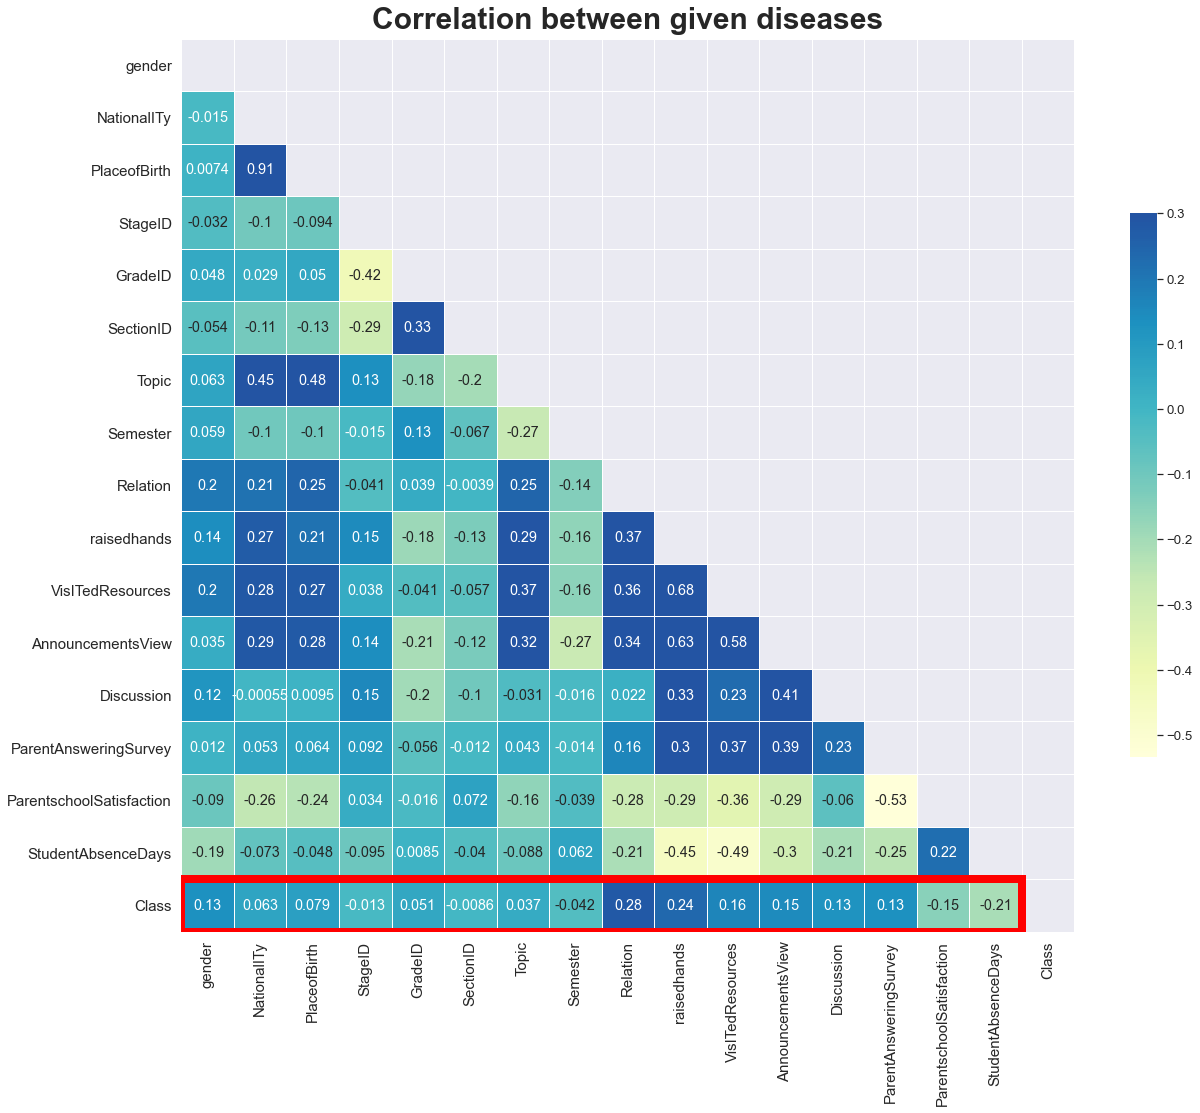

In [168]:
sns.set(font_scale = 1.2)
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap="YlGnBu", annot=True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title('Correlation between given diseases', fontsize=30, fontweight='bold', pad=10)
ax.tick_params(axis='both', labelsize=15)
ax.set_yticklabels(ax.get_xticklabels(), rotation = 360)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.add_patch(Rectangle((0,16),16,1, fill=False, edgecolor='red', lw=8))

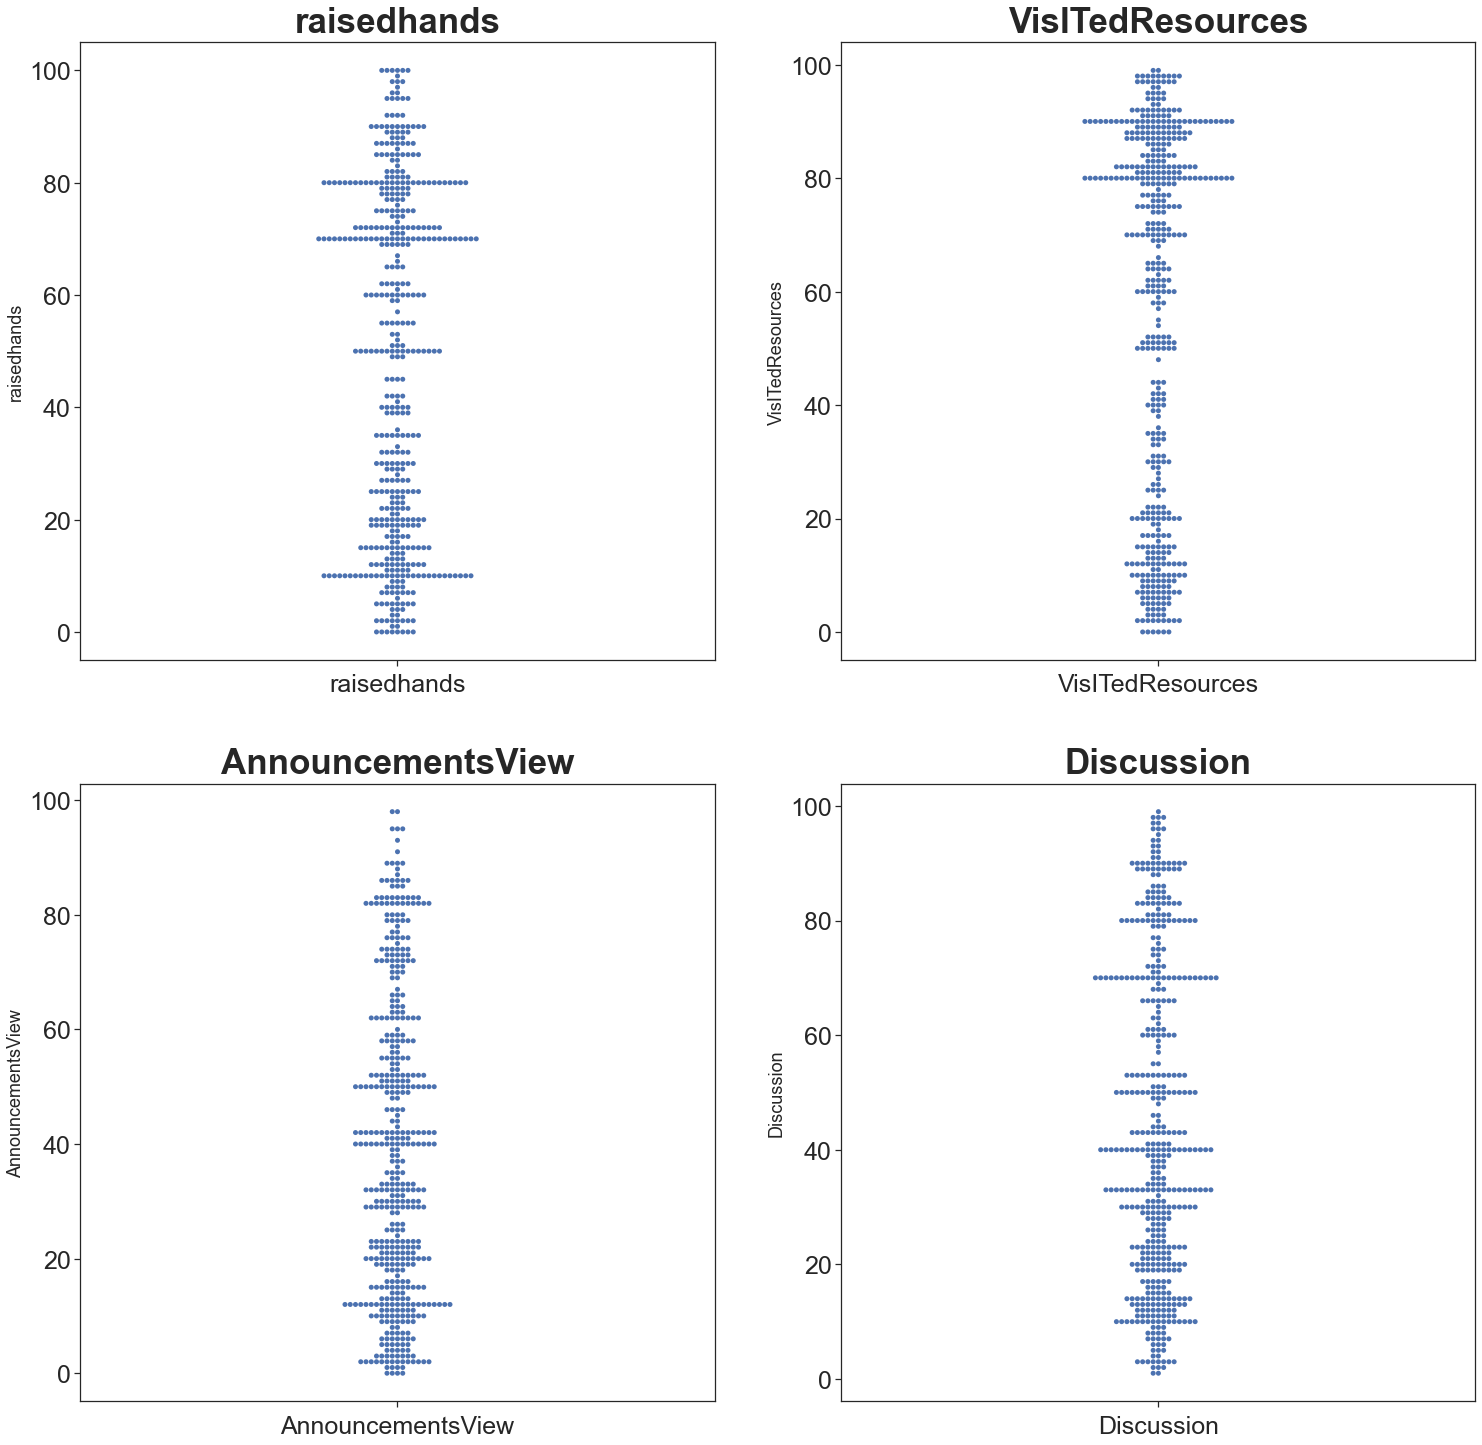

In [225]:
fig, axes = plt.subplots(2, 2, figsize=(25, 25))
classes = ["raisedhands", "VisITedResources", "AnnouncementsView", "Discussion"]
i = 0
for row in range(2):
    for col in range(2):
        sns.set(font_scale = 1.5)
        temp = sns.swarmplot(ax = axes[row, col], y=df[classes[i]])
        axes[row, col].tick_params(axis='both', labelsize=25)
        axes[row, col].set_title(classes[i], fontsize=35, fontweight ='bold', pad=10)
        temp.set_xlabel(classes[i], fontsize = 25)
        i += 1
        sns.set_style("ticks")
plt.show()

In [234]:
X = df[["raisedhands", "VisITedResources", "AnnouncementsView", "Discussion"]]
cols = df.columns[9:13]

In [236]:
from sklearn import datasets, preprocessing
norm = preprocessing.MinMaxScaler(feature_range=(0,1)).fit(X)
X_minmax = pd.DataFrame(norm.transform(X), columns=cols)

X_minmax

,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,0.15,0.161616,0.020408,0.193878
1,0.20,0.202020,0.030612,0.244898
2,0.10,0.070707,0.000000,0.295918
3,0.30,0.252525,0.051020,0.346939
4,0.40,0.505051,0.122449,0.500000
...,...,...,...,...
463,0.05,0.040404,0.051020,0.071429
464,0.50,0.777778,0.142857,0.275510
465,0.55,0.747475,0.255102,0.285714
466,0.30,0.171717,0.142857,0.571429


In [237]:
X_minmax.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,468.000000,468.000000,468.000000,468.000000
mean,0.476410,0.564880,0.395713,0.435549
std,0.306555,0.330270,0.269143,0.282511
min,0.000000,0.000000,0.000000,0.000000
25%,0.170000,0.202020,0.153061,0.193878
50%,0.500000,0.696970,0.352041,0.397959
75%,0.750000,0.858586,0.591837,0.704082
max,1.000000,1.000000,1.000000,1.000000


In [242]:
scale = preprocessing.StandardScaler().fit(X_minmax)
X_scaled = pd.DataFrame(scale.transform(X_minmax), columns=cols)

X_scaled.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,-1.065908,-1.222320,-1.395939,-0.856356
1,-0.902631,-1.099852,-1.357986,-0.675566
2,-1.229186,-1.497871,-1.471847,-0.494777
3,-0.576076,-0.946768,-1.282078,-0.313987
4,-0.249521,-0.181346,-1.016401,0.228382


In [243]:
X_scaled.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,4.680000e+02,4.680000e+02,4.680000e+02,4.680000e+02
mean,-4.258227e-17,-6.196373e-16,-9.797481e-17,4.791988e-17
std,1.001070e+00,1.001070e+00,1.001070e+00,1.001070e+00
min,-1.555741e+00,-1.712189e+00,-1.471847e+00,-1.543357e+00
25%,-1.000598e+00,-1.099852e+00,-9.025394e-01,-8.563561e-01
50%,7.703345e-02,4.003744e-01,-1.624392e-01,-1.331972e-01
75%,8.934205e-01,8.902443e-01,7.294763e-01,9.515411e-01
max,1.709808e+00,1.318880e+00,2.247630e+00,2.000122e+00


In [244]:
df[["raisedhands", "VisITedResources", "AnnouncementsView", "Discussion"]] = X_scaled[["raisedhands", "VisITedResources", "AnnouncementsView", "Discussion"]]

In [247]:
df.tail(20)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
460,0,13,12,2,3,1,12,1,1,1.056698,0.951478,1.336738,0.879225,1,1,2,1
461,0,13,12,2,3,1,12,0,1,1.219975,0.982095,1.526507,0.951541,1,1,2,1
462,0,13,12,2,3,1,9,1,1,-1.490430,-1.497871,-1.320032,-1.290251,1,1,2,1
463,0,13,12,2,3,1,9,0,1,-1.392463,-1.589722,-1.282078,-1.290251,1,1,2,1
464,1,6,6,2,3,1,11,1,2,0.077033,0.645309,-0.940493,-0.567093,1,1,1,3
465,1,6,6,2,3,1,11,0,2,0.240311,0.553459,-0.523001,-0.530935,1,1,1,3
466,1,6,6,2,3,1,12,1,2,-0.576076,-1.191703,-0.940493,0.481488,1,1,1,3
467,1,6,6,2,3,1,12,0,2,-0.412799,-1.283553,-0.598909,0.662278,1,1,1,3
468,1,6,6,2,3,1,11,1,1,NaN,NaN,NaN,NaN,0,2,2,2
469,1,6,6,2,3,1,11,0,1,NaN,NaN,NaN,NaN,0,2,2,2


In [248]:
sum(df.isna().sum()) + sum(df.isnull().sum())

96

In [249]:
df = df.dropna()

In [274]:
from sklearn.metrics import classification_report

y = df.Class
X = df.drop('Class', axis=1)

clf = DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X,y)

In [277]:
from sklearn import tree

text_representation = tree.export_text(clf, feature_names=list(df.columns[:-1]))
print(text_representation)

|--- StudentAbsenceDays <= 1.50
|   |--- Relation <= 1.50
|   |   |--- Topic <= 9.50
|   |   |   |--- GradeID <= 7.50
|   |   |   |   |--- VisITedResources <= 0.89
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- VisITedResources >  0.89
|   |   |   |   |   |--- class: 1
|   |   |   |--- GradeID >  7.50
|   |   |   |   |--- Discussion <= 0.19
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Discussion >  0.19
|   |   |   |   |   |--- class: 3
|   |   |--- Topic >  9.50
|   |   |   |--- ParentschoolSatisfaction <= 1.50
|   |   |   |   |--- raisedhands <= 1.14
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- raisedhands >  1.14
|   |   |   |   |   |--- class: 1
|   |   |   |--- ParentschoolSatisfaction >  1.50
|   |   |   |   |--- Discussion <= 0.46
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Discussion >  0.46
|   |   |   |   |   |--- class: 3
|   |--- Relation >  1.50
|   |   |--- VisITedResources <= 0.97
|   |   |   |--- ParentAnsweringSurvey <= 0.50
|   |

In [282]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    feature_names = [f.replace(" ", "_")[:-5] for f in feature_names]
    print("def predict({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "    " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, np.round(threshold,2)))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, np.round(threshold,2)))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)

In [283]:
rules = get_rules(clf, list(df.columns[:-1]), list(df["Class"]))
for r in rules:
    print(r)

if (StudentAbsenceDays <= 1.5) and (Relation > 1.5) and (VisITedResources <= 0.967) and (ParentAnsweringSurvey > 0.5) and (Discussion <= 1.982) then class: 2 (proba: 87.18%) | based on 78 samples
if (StudentAbsenceDays <= 1.5) and (Relation <= 1.5) and (Topic <= 9.5) and (GradeID <= 7.5) and (VisITedResources <= 0.89) then class: 1 (proba: 85.19%) | based on 54 samples
if (StudentAbsenceDays > 1.5) and (ParentAnsweringSurvey <= 0.5) and (Discussion <= 1.15) and (Discussion <= -0.061) and (GradeID > 1.5) then class: 1 (proba: 95.35%) | based on 43 samples
if (StudentAbsenceDays > 1.5) and (ParentAnsweringSurvey > 0.5) and (Topic > 2.5) and (AnnouncementsView > -1.358) and (AnnouncementsView > 0.312) then class: 1 (proba: 72.41%) | based on 29 samples
if (StudentAbsenceDays <= 1.5) and (Relation <= 1.5) and (Topic <= 9.5) and (GradeID > 7.5) and (Discussion <= 0.192) then class: 1 (proba: 73.08%) | based on 26 samples
if (StudentAbsenceDays > 1.5) and (ParentAnsweringSurvey > 0.5) and (T